In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import string
import spacy
import re
from sklearn.metrics import log_loss

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
trainData['text'] = trainData['Title']
trainData['label'] = trainData['Class Index']

**Preprocessing Techniques**

In [ ]:
def preprocessing(text):
  text = text.lower()

  #remove Numbers
  text = re.sub(r'\d+','',text)

  #remove punctuations
  text = text.translate(str.maketrans('','', string.punctuation))

  text = word_tokenize(text)

  #remove stopwords such as "is", "am", "the" etc
  stopWord = set(stopwords.words('english'))
  filtered_Data = [word for word in text if word not in stopWord]
  return ' '.join(filtered_Data)

trainData['clean_text'] = trainData['text'].apply(preprocessing)

print(f"{trainData['text']}\n\n")
print(trainData['clean_text'])

0         Wall St. Bears Claw Back Into the Black (Reuters)
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2           Oil and Economy Cloud Stocks' Outlook (Reuters)
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996                    Renteria signing a top-shelf deal
119997                      Saban not going to Dolphins yet
119998                                    Today's NFL games
119999                         Nets get Carter from Raptors
Name: text, Length: 120000, dtype: object


0                     wall st bears claw back black reuters
1         carlyle looks toward commercial aerospace reuters
2                  oil economy cloud stocks outlook reuters
3         iraq halts oil exports main southern pipeline ...
4         oil prices soar alltime record posing new mena

**Feature Extraction**

In [ ]:
CountVectorize = CountVectorizer()
X_train1 = CountVectorize.fit_transform(trainData['clean_text'])

TfVectorize = TfidfVectorizer()
X_train2 = TfVectorize.fit_transform(trainData['clean_text'])

vectorizeData1 = pd.DataFrame(X_train1.toarray(), columns=CountVectorize.get_feature_names_out())
print(f"Count Vectorizer: \n {vectorizeData1}\n\n")

vectorizeData2 = pd.DataFrame(X_train2.toarray(), columns=TfVectorize.get_feature_names_out())
print(f"TFIDF Vectorizer: \n {vectorizeData2}")

Count Vectorizer: 
         aa  aaa  aac  aachen  aaliyah  aapl  aapt  aaron  aarp  aarrett  ...  \
0        0    0    0       0        0     0     0      0     0        0  ...   
1        0    0    0       0        0     0     0      0     0        0  ...   
2        0    0    0       0        0     0     0      0     0        0  ...   
3        0    0    0       0        0     0     0      0     0        0  ...   
4        0    0    0       0        0     0     0      0     0        0  ...   
...     ..  ...  ...     ...      ...   ...   ...    ...   ...      ...  ...   
119995   0    0    0       0        0     0     0      0     0        0  ...   
119996   0    0    0       0        0     0     0      0     0        0  ...   
119997   0    0    0       0        0     0     0      0     0        0  ...   
119998   0    0    0       0        0     0     0      0     0        0  ...   
119999   0    0    0       0        0     0     0      0     0        0  ...   

        zuckerman  

**Testing Data Preparation**

In [ ]:
testData = pd.read_csv('test.csv')
testData.head()

testData['text'] = testData['Title']
testData['label'] = testData['Class Index']

testData['clean_text'] = testData['text'].apply(preprocessing)

X_test1 = CountVectorize.transform(testData['clean_text'])
vectorizeData1 = pd.DataFrame(X_test1.toarray(), columns=CountVectorize.get_feature_names_out())
print(f"Count Vectorizer: \n {vectorizeData1}\n\n")

X_test2 = TfVectorize.transform(testData['clean_text'])
vectorizeData2 = pd.DataFrame(X_test2.toarray(), columns=TfVectorize.get_feature_names_out())
print(f"TFIDF Vectorizer: \n {vectorizeData2}")

Count Vectorizer: 
       aa  aaa  aac  aachen  aaliyah  aapl  aapt  aaron  aarp  aarrett  ...  \
0      0    0    0       0        0     0     0      0     0        0  ...   
1      0    0    0       0        0     0     0      0     0        0  ...   
2      0    0    0       0        0     0     0      0     0        0  ...   
3      0    0    0       0        0     0     0      0     0        0  ...   
4      0    0    0       0        0     0     0      0     0        0  ...   
...   ..  ...  ...     ...      ...   ...   ...    ...   ...      ...  ...   
7595   0    0    0       0        0     0     0      0     0        0  ...   
7596   0    0    0       0        0     0     0      0     0        0  ...   
7597   0    0    0       0        0     0     0      0     0        0  ...   
7598   0    0    0       0        0     0     0      0     0        0  ...   
7599   0    0    0       0        0     0     0      0     0        0  ...   

      zuckerman  zukauskas  zuma  zundel  z

**Model Classifier Training**

In [ ]:
label_mapping = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}

trainData['label_text'] = trainData['Class Index'].map(label_mapping)
testData['label_text'] = testData['Class Index'].map(label_mapping)

y_train = trainData['label_text']
y_train.map(label_mapping)

y_test = testData['label_text']
y_test.map(label_mapping)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

X_train1.shape
# y_train.shape

(120000, 36910)

**SVM**

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split
# import numpy as np
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt

# svm_classifier = SVC(kernel='rbf', gamma=0.5, C=1.0, random_state=42)
# svm_history = svm_classifier.fit(X_train2, y_train)

# #training prediction
# svm_train_pred = svm_classifier.predict(X_train2)

# #testin prediction
# svm_test_pred = svm_classifier.predict(X_test2)

# #training Results
# print(f'Training Accuracy:\n {accuracy_score(svm_train_pred, y_train)} \n\n')
# print(f'Training Classification Report:\n {classification_report(svm_train_pred, y_train)} \n\n')
# print(f'Training Confusion Matrix:\n {confusion_matrix(svm_train_pred, y_train)} \n\n\n')

# #Testing Results
# print(f'Testing Accuracy:\n {accuracy_score(svm_test_pred, y_test)} \n\n')
# print(f'Testing Classification Report:\n {classification_report(svm_test_pred, y_test)} \n\n')
# print(f'Testing Confusion Matrix:\n {confusion_matrix(svm_test_pred, y_test)} \n\n')

In [ ]:
# history_dict = svm_history.history
# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# # loss = histor_dict['loss']
# val_loss = history_dict['val_loss']

# plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
# plt.plot(acc)
# plt.plot(val_acc)
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(['Accuracy', 'Validation Accuracy'])

# plt.subplot(1, 2, 2)
# plt.plot(loss)
# plt.plot(val_loss)
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Loss', 'Validation Loss'])

# plt.show()

**XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(
    X_train2, y_train,
    eval_set=[(X_train2, y_train), (X_test2, y_test)],
    verbose=True
)

#training prediction
train_pred = xgb_model.predict(X_train2)

#testing prediction
test_pred = xgb_model.predict(X_test2)

#training Results
print(f'Training Accuracy:\n {accuracy_score(train_pred, y_train)} \n\n')
print(f'Training Classification Report:\n {classification_report(train_pred, y_train)} \n\n')
print(f'Training Confusion Matrix:\n {confusion_matrix(train_pred, y_train)} \n\n\n')

#Testing Results
print(f'Testing Accuracy:\n {accuracy_score(test_pred, y_test)} \n\n')
print(f'Testing Classification Report:\n {classification_report(test_pred, y_test)} \n\n')
print(f'Testing Confusion Matrix:\n {confusion_matrix(test_pred, y_test)} \n\n')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:49:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.32202	validation_1-mlogloss:1.32433
[1]	validation_0-mlogloss:1.28088	validation_1-mlogloss:1.28261
[2]	validation_0-mlogloss:1.24871	validation_1-mlogloss:1.25184
[3]	validation_0-mlogloss:1.22216	validation_1-mlogloss:1.22615
[4]	validation_0-mlogloss:1.20040	validation_1-mlogloss:1.20383
[5]	validation_0-mlogloss:1.18074	validation_1-mlogloss:1.18414
[6]	validation_0-mlogloss:1.16335	validation_1-mlogloss:1.16712
[7]	validation_0-mlogloss:1.14639	validation_1-mlogloss:1.15078
[8]	validation_0-mlogloss:1.13176	validation_1-mlogloss:1.13688
[9]	validation_0-mlogloss:1.11804	validation_1-mlogloss:1.12291
[10]	validation_0-mlogloss:1.10534	validation_1-mlogloss:1.11060
[11]	validation_0-mlogloss:1.09366	validation_1-mlogloss:1.09917
[12]	validation_0-mlogloss:1.08272	validation_1-mlogloss:1.08922
[13]	validation_0-mlogloss:1.07231	validation_1-mlogloss:1.07883
[14]	validation_0-mlogloss:1.06263	validation_1-mlogloss:1.07026
[15]	validation_0-mlogloss:1.05306	

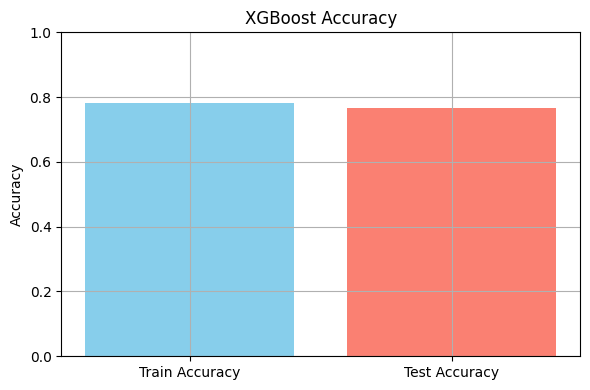

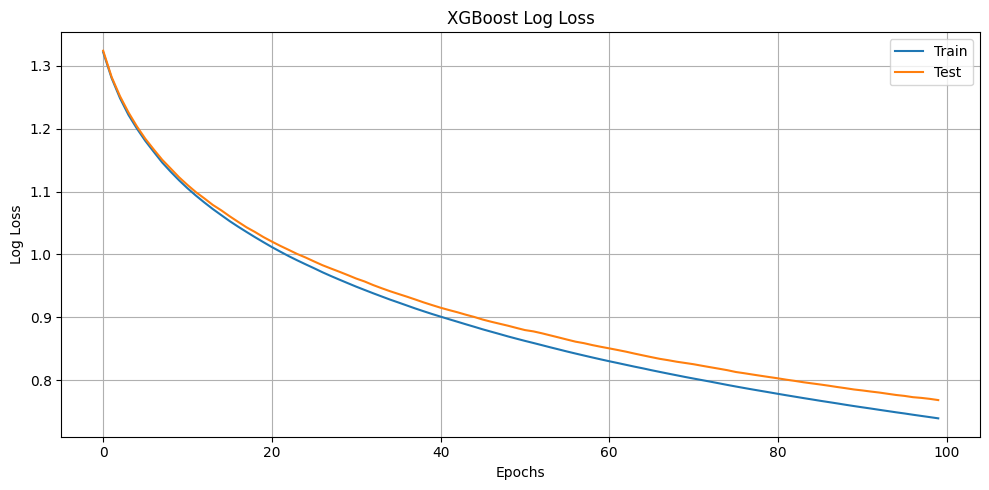

In [ ]:
# Plotting training history
results = xgb_model.evals_result()
epochs = len(results['validation_0']['mlogloss'])

x_axis = range(0, epochs)

# Accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'salmon'])
plt.title('XGBoost Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot log loss
plt.figure(figsize=(10, 5))

plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Testing XGBoost**

In [ ]:
# Real-world headline
#world
# new_headline = "Peace talks resume between neighboring countries after months of tension"
# Sports
new_headline = "Local team wins national basketball championship in thrilling final"
# Business
# new_headline = "Tech giant announces record quarterly profits amid strong sales"
# new_headline = "Startup secures $50 million funding to expand AI platform"
# Sci/Tech
# new_headline = "Space agency plans mission to Mars in next decade"

# Step 1: Preprocess
cleaned = preprocessing(new_headline)

# Step 2: Vectorize
vectorized = CountVectorize.transform([cleaned])  # NOTE: must be list or array

# Step 3: Predict
prediction = xgb_model.predict(vectorized)
predicted_label = le.inverse_transform(prediction)
print("Predicted Class Index:", predicted_label)


Predicted Class Index: ['Sports']


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train2, y_train)

#training prediction
knn_train_pred = knn.predict(X_train2)

#testin prediction
knn_test_pred = knn.predict(X_test2)

knn_train_proba = knn.predict_proba(X_train2)
knn_test_proba = knn.predict_proba(X_test2)

# Accuracy
train_acc = accuracy_score(y_train, knn_train_pred)
test_acc = accuracy_score(y_test, knn_test_pred)

# Loss (log loss)
train_loss = log_loss(y_train, knn_train_proba)
test_loss = log_loss(y_test, knn_test_proba)

#training Results
print(f'Training Accuracy:\n {accuracy_score(knn_train_pred, y_train)} \n\n')
print(f'Training Classification Report:\n {classification_report(knn_train_pred, y_train)} \n\n')
print(f'Training Confusion Matrix:\n {confusion_matrix(knn_train_pred, y_train)} \n\n\n')

#Testing Results
print(f'Testing Accuracy:\n {accuracy_score(knn_test_pred, y_test)} \n\n')
print(f'Testing Classification Report:\n {classification_report(knn_test_pred, y_test)} \n\n')
print(f'Testing Confusion Matrix:\n {confusion_matrix(knn_test_pred, y_test)} \n\n')

Training Accuracy:
 0.9930083333333334 


Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29973
           1       0.99      0.99      0.99     30016
           2       1.00      1.00      1.00     30014
           3       1.00      1.00      1.00     29997

    accuracy                           0.99    120000
   macro avg       0.99      0.99      0.99    120000
weighted avg       0.99      0.99      0.99    120000
 


Training Confusion Matrix:
 [[29657   237     7    72]
 [  270 29693    11    42]
 [    7    20 29956    31]
 [   66    50    26 29855]] 



Testing Accuracy:
 0.6477631578947368 


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65      1813
           1       0.60      0.71      0.65      1603
           2       0.84      0.52      0.64      3063
           3       0.51      0.87      0.65      1121

 

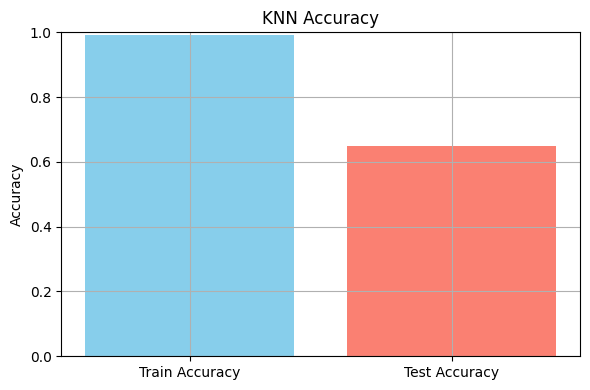

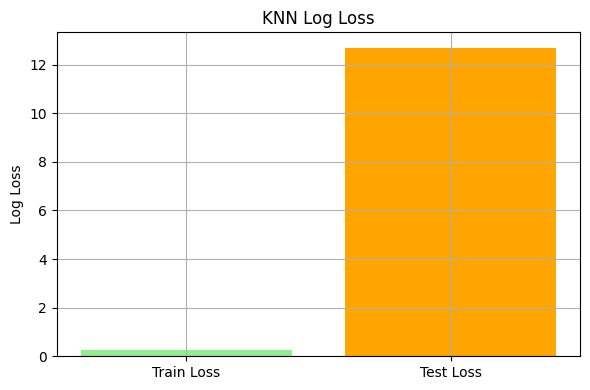

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'salmon'])
plt.title('KNN Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Loss Plot
plt.figure(figsize=(6, 4))
plt.bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['lightgreen', 'orange'])
plt.title('KNN Log Loss')
plt.ylabel('Log Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Real-world headline
#world
# new_headline = "Peace talks resume between neighboring countries after months of tension"
# Sports
# new_headline = "Local team wins national basketball championship in thrilling final"
# Business
new_headline = "Tech giant announces record quarterly profits amid strong sales"
# Sci/Tech
# new_headline = "Space agency plans mission to Mars in next decade"

# Step 1: Preprocess
cleaned = preprocessing(new_headline)

# Step 2: Vectorize
vectorized = CountVectorize.transform([cleaned])  # NOTE: must be list or array

# Step 3: Predict
prediction = knn.predict(vectorized)  # assuming xgb_model is your trained XGBoost classifier
predicted_label = le.inverse_transform(prediction)
print("Predicted Class Index:", predicted_label)


Predicted Class Index: ['Business']
